## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#Select three indices of your choice you wish to sample from the dataset
indices = [8,137,228]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,3087,8080,8282,661,721,36
2,1869,577,572,950,4762,203


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer**

| Categories | Mean Values(MV) | Sample 0  | 
| ------------ | ------------ | ------------ | 
|  Fresh |  12000.2977 | 5963  |  
| Milk  |  5796.2 |  3648 |   
| Grocery  |  7951 |  6192 |   
| Frozen  |  3072 |  425 |   
|  Detergents_paper |  2881.4 | 1716  |   
|  Delicatessen | 1524.8  | 750  |

From the table above, the sample customer 0 buys more fresh, milk and groceries because the global mean values are somewhat closer to the customer data; therefore, the sample customer 0 represents a market. Also, the detergent and paper data of the consumer is also considerably high but not close to the global mean.

| Categories | Mean Values(MV) | Sample 1  | 
| ------------ | ------------ | ------------ | 
|  Fresh |  12000.2977 | 3087  |  
| Milk  |  5796.2 |  8080 |   
| Grocery  |  7951 |  8282 |   
| Frozen  |  3072 |  661 |   
|  Detergents_paper |  2881.4 | 721  |   
|  Delicatessen | 1524.8  | 36  |

From the table above, the customer sample 1 clearly spends more money on fresh, milk and grocery department. The spending in milk and grocery department is significantly more than the global mean of the respective department. Therefore, the customer sample 1 represents a cafe or a breakfast restaurant.

| Categories | Mean Values(MV) | Sample 2  | 
| ------------ | ------------ | ------------ | 
|  Fresh |  12000.2977 | 1869  |  
| Milk  |  5796.2 |  577 |   
| Grocery  |  7951 |  572 |   
| Frozen  |  3072 |  950 |   
|  Detergents_paper |  2881.4 | 4762  |   
|  Delicatessen | 1524.8  | 203 |

From the table above, the customer sample 2 could represent a wholesale retailer. The spending of the customer is low in all the categories except for detergent and paper. The annual expenditure on all the food products is well below the global average. Therefore, a wholesale retailer or a  retailer seems a better choice. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, I will implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'],axis = 1)
grocery = data['Grocery']

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, grocery, test_size = 0.25, random_state=99)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
y_pred = regressor.predict(X_test)
#score  = regressor.score(X_test,y_test)
score = r2_score(y_test, y_pred)  
print(score)

0.745316042614


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

- I chose to predict the grocery feature because the grocery feature seems relevant or related to the other features like frozen, deli, milk and fresh. Therefore, I thought the prediction of the grocery feature would be with somewhat high accuracy. 

- The reported prediction score is 0.745316042614

- $$R^2 = 1 - \left(\frac{	\hat{y}}{\bar{y}} \right)^2$$
If the R^2 Inline prediction is below 0, it means that the predictor performed more mediocre than the average value. If the R^2 value is zero, the predictor performed equal to the average value, and if the R^2 value is close to 1, the predictor performed much better than the average value. Here, in this case, the score is about 0.74 which is close to 1; therefore, the predictor did a good job. 
- The score of 0.74 also proves that the grocery feature can be predicted with high accuracy using the other elements. Hence, the grocery feature does not seem necessary for identifying customers' spending habit.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


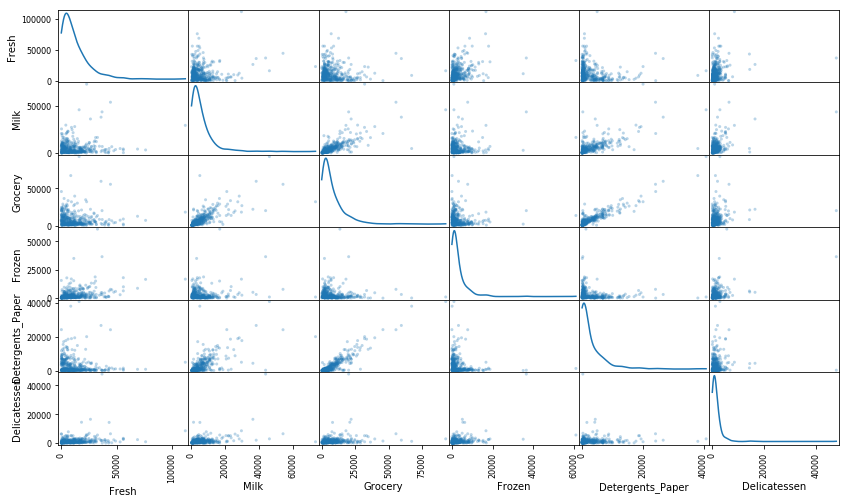

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

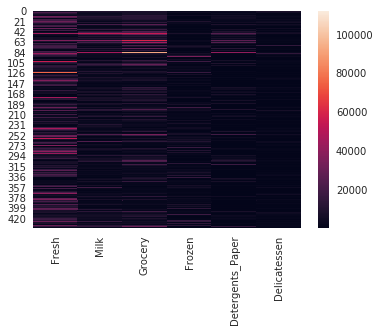

In [6]:
import seaborn as sns; sns.set()
ax = sns.heatmap(data)

KeyError: (0, 0)

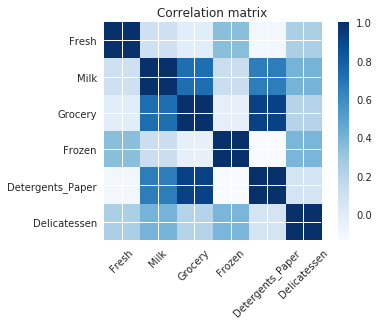

In [7]:
import matplotlib.pyplot as plt
import itertools

corr = data.corr()

#The following function is borrowed from the confution matrix documentation on sklearn website
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Correlation matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    
    
classes = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen' ]
plot_confusion_matrix(corr, classes=classes, normalize=False,title='Correlation matrix')
plt.show()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?


**Answer:**
- As we can see in the scatter plot matrix, the approximated PDF of all the features look similar and peaks close to the zero and decreases rapidly as the x-axis number increases. Most of the data is concentrated in the lower left corner of the plot. Only a few points are scattered around the top/middle/low right corner of the plot for all the features. Therefore, the points in the top right corner potentially are the outliers. The distribution of the dataset is somewhat normal close to zero. But overall, the distribution does not look exactly normal. The heat map shows that most of the points in the features other than fresh and grocery are below 2000. 

- From the correlation matrix graph, the Detergents_Paper feature seems correlated to grocery and milk. Milk and grocery are also correlated with each other. On the other hand, fresh appears to be weakly correlated to frozen and deli. 

- Since grocery is correlated to the milk and detergents_paper, the prediction of the grocery feature had high accuracy. Hence, it confirms suspicions about the relevance of the feature I attempted to predict. 

- The data distribution seems normal close to zero; however, the presence of a few scattered points away from the majority of the data is the prime reason for not having a normal distribution. The data needs to be cleaned to make a normal distribution. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


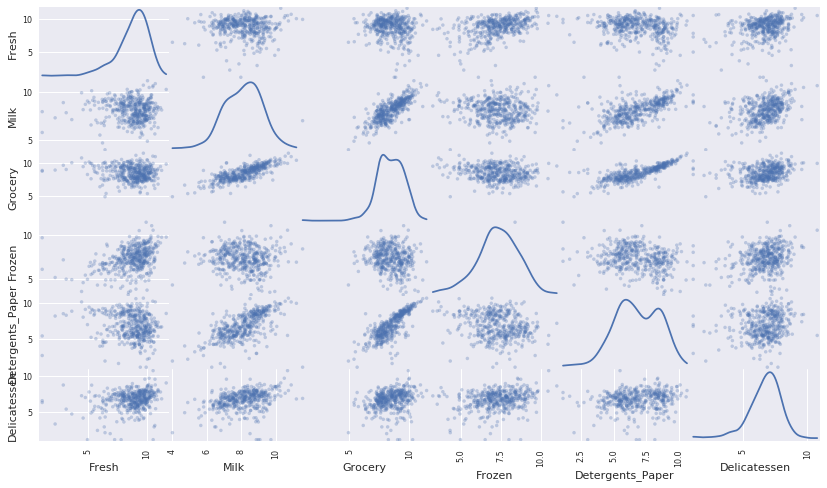

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
1,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
2,7.533159,6.357842,6.349139,6.856462,8.468423,5.313206


KeyError: (0, 0)

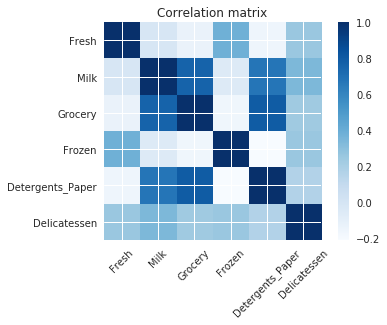

In [10]:
log_corr = log_data.corr()
plot_confusion_matrix(log_corr, classes=classes, normalize=False,title='Correlation matrix')
plt.show()

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, I will implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values
outliers = []

for feature in log_data.keys():
    
    #Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:,feature], 25)
    
    #Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:,feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Select the indices for data points you wish to remove
    
    feature_outlier =list(log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)),:].index)
    print(feature_outlier)
    #pd.concat([outliers,feature_outlier])
    outliers.extend(list(feature_outlier))
    
print('\n\nAll outlier indices: ',outliers)

duplicate_index = set([indices for indices in outliers if outliers.count(indices) > 1])

print('\n\nDuplicate indices in the outliers: ',duplicate_index )

outliers = list(set([indices for indices in outliers]))

print('\n\nUnique outlier indices: ',outliers)
    # Remove the outliers, if any were specified
    
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Data points considered outliers for the feature 'Milk':
[86, 98, 154, 356]
Data points considered outliers for the feature 'Grocery':
[75, 154]
Data points considered outliers for the feature 'Frozen':
[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
Data points considered outliers for the feature 'Detergents_Paper':
[75, 161]
Data points considered outliers for the feature 'Delicatessen':
[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


All outlier indices:  [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


Duplicate indices in the outliers:  {128, 65, 66, 75, 154}


Unique outlier indices:  [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

**Answer:**
- There are five data points considered outliers for more than one feature. The indices {128, 65, 66, 75, 154} are outliers in multiple features.
- The data points that have outliers in multiple features should be removed because the data is not used for multiple features, and the multiple feature outliers also spoil the performance of clustering like K-means.
- The outliers determined by the Tukey's method has potential to jeopardize the outcome of the analysis like clustering, regression, and normalization of the data. Therefore, the outliers should be removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, I will implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

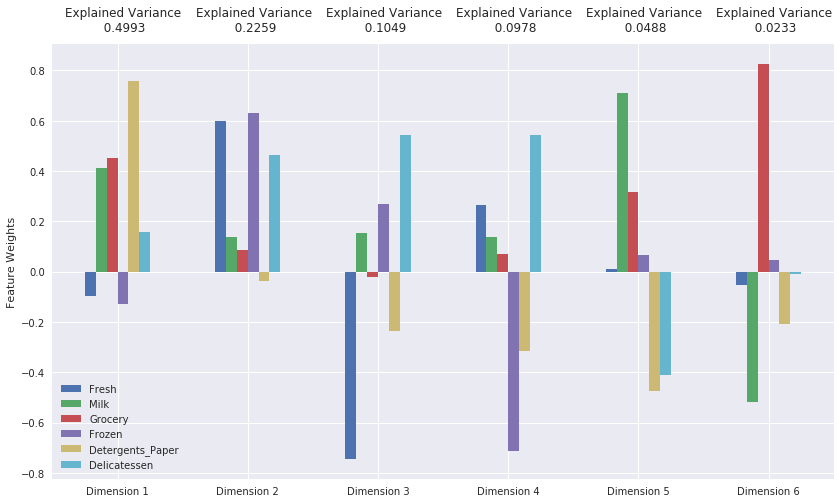

In [12]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.


**Answer:**
- 0.7252 out of 1 (72.52%) variance is explained by the first and second principle component.
- 92.79% of the variance is covered by the first four principle components.
- PC1:
    - The features with significant weights: Milk, Grocery, Detergent_Papers
    - Intuitively the variable grocery covers milk and detergent_paper; therefore, the variance being maximum for these features makes sense. 
    - Also, the element in PC1 is also found to be correlated in the correlation matrix shown in the answer of the question 3.
- PC2:
    - The features with significant weights: Fresh, Frozen and Deli
    - Also, in this case the combination of fresh, frozen and deli also makes sense intuitively.
    - As seen in the correlation matrix, there is a weak correlation between frozen, fresh and deli.
- PC3
    - The features with significant weights: Fresh with negative and Deli with positive weight
    - The third principal component shows the variance in the third dimension with much spending in the deli while not spending in fresh. 
- PC4
    - The features with significant weights: Frozen with negative, detergent_paper with negative, and Deli with positive weight
    -The less spending in frozen and detergent and more spending in Deli os what the fourth principle component revels. 
    

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8467,-1.0829,-0.4359,0.6445,-0.1767,0.0290
1,0.1744,-2.4412,-1.1533,-1.0959,2.1619,0.1231
2,-0.4063,-2.3727,-0.5411,-1.6951,-2.1409,-1.0845


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [38]:
#Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

#Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
display(reduced_data)

,Dimension 1,Dimension 2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314
5,1.133476,-0.125660
6,1.170126,-0.758369
7,1.659256,0.545866
8,0.846701,-1.082903
9,2.952371,0.222338


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8467,-1.0829
1,0.1744,-2.4412
2,-0.4063,-2.3727


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

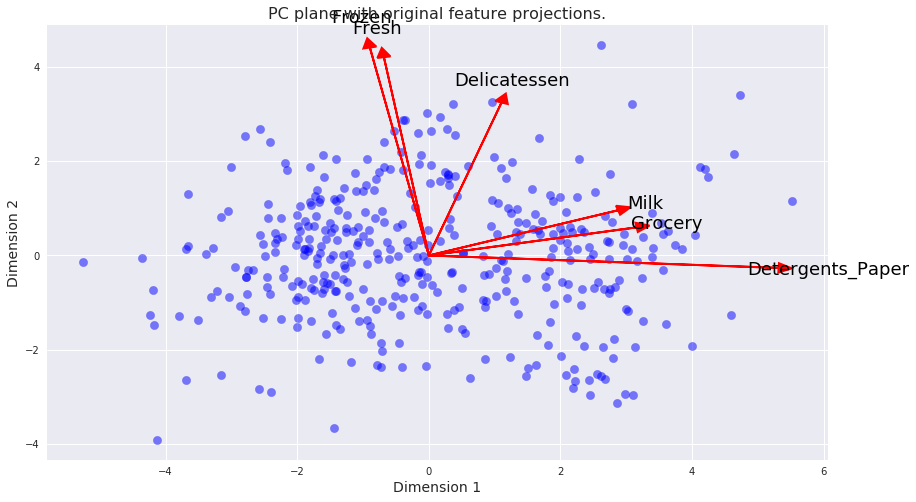

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Answer:
- From the graph, it looks like Fresh, Frozen and Deli are correlated with each other in second principle component while Milk, Grocery, and Detergent_Paper are associated with each other in first principle component. 

- The results in bi-plot matches precisely with the pca_results plot obtained earlier.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?


**Answer:**
- The advantages of the K-means clustering algorithm
    - K-means clustering algorithm is computationally efficient for large data
    - K-means clustering algorithm is easy to understand and implement
    - K-means works well with an approximately circular cluster with uniform density.
- The advantages of the Gaussian Mixture Model (GMM) clustering algorithm
    - Mixed membership is one of the most significant advantages of the GMM clustering algorithm. A single point can belong to two different clusters in mixed membership.
    - Unlike k-means, GMM clustering algorithm works well with non-circular cluster and elliptical clusters. The covariance matrix with flexible values can take many shapes to define a group.
- So far, the data does not have any apparent clustering patterns. All the features have some overlap with each other; therefore, I think applying the GMM clustering algorithm will be the best for the given dataset.  

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, I will implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [50]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn import metrics

print('GMM:\n\n')
n_components_range = range(2, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Apply your clustering algorithm of choice to the reduced data 
        clusterer = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        clusterer.fit(reduced_data)

        # Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)
        # Find the cluster centers
        centers = clusterer.means_

        # Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # Calculate the mean silhouette coefficient for the number of clusters chosen
        score =  metrics.silhouette_score(reduced_data, preds)
        
        print("The # of clusters: %.2f, the cv matrix type: %s, the mean silhouette coefficient: %.2f" %  (n_components,cv_type,score))
        
        

GMM:


The # of clusters: 2.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.45
The # of clusters: 3.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.35
The # of clusters: 4.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.33
The # of clusters: 5.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.35
The # of clusters: 6.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.32
The # of clusters: 7.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.29
The # of clusters: 2.00, the cv matrix type: tied, the mean silhouette coefficient: 0.44
The # of clusters: 3.00, the cv matrix type: tied, the mean silhouette coefficient: 0.36
The # of clusters: 4.00, the cv matrix type: tied, the mean silhouette coefficient: 0.33
The # of clusters: 5.00, the cv matrix type: tied, the mean silhouette coefficient: 0.35
The # of clusters: 6.00, the cv matrix type: tied, the mean silhouette co

In [52]:
print('K-Means:\n\n')
n_components_range = range(2, 8)
for n_components in n_components_range:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_components)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score =  metrics.silhouette_score(reduced_data, preds)

    print("The # of clusters: %.2f, the cv matrix type: %s, the mean silhouette coefficient: %.2f" %  (n_components,cv_type,score))


K-Means:


The # of clusters: 2.00, the cv matrix type: full, the mean silhouette coefficient: 0.45
The # of clusters: 3.00, the cv matrix type: full, the mean silhouette coefficient: 0.36
The # of clusters: 4.00, the cv matrix type: full, the mean silhouette coefficient: 0.33
The # of clusters: 5.00, the cv matrix type: full, the mean silhouette coefficient: 0.35
The # of clusters: 6.00, the cv matrix type: full, the mean silhouette coefficient: 0.36
The # of clusters: 7.00, the cv matrix type: full, the mean silhouette coefficient: 0.35


In [56]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score =  metrics.silhouette_score(reduced_data, preds)

print("The # of clusters: %.2f, the mean silhouette coefficient: %.2f" %  (2,score))


The # of clusters: 2.00, the mean silhouette coefficient: 0.45


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
- The # of clusters: 2.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.45

    The # of clusters: 3.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.35

    The # of clusters: 4.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.33

    The # of clusters: 5.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.35

    The # of clusters: 6.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.32

    The # of clusters: 7.00, the cv matrix type: spherical, the mean silhouette coefficient: 0.29
    
- The GMM with two cluster has the highest or best silhouette score of 0.45.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

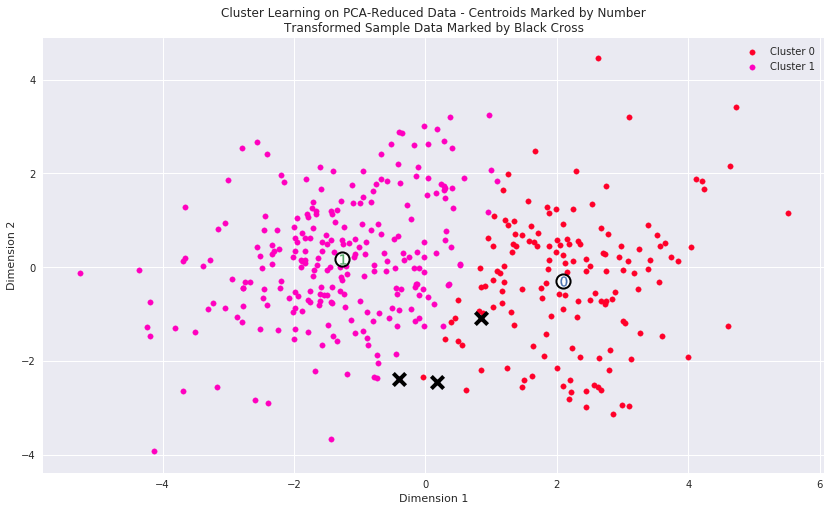

In [57]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, I will implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [58]:
#Inverse transform the centers
log_centers = pca.inverse_transform(centers)
#Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?


**Answer:**

| Categories | Mean Values(MV) | Segment 0  | 
| ------------ | ------------ | ------------ | 
|  Fresh |  12000.2977 | 5219  |  
| Milk  |  5796.2 |  7671 |   
| Grocery  |  7951 |  11403 |   
| Frozen  |  3072 |  1079 |   
|  Detergents_paper |  2881.4 | 4413  |   
|  Delicatessen | 1524.8  | 1099  |

- The segment 0 has more than the average spending on milk, grocery, and Detergent_Paper. Since the segment 0 has more expenditure on the milk and grocery, the establishment could be a cafe or a breakfast place.

| Categories | Mean Values(MV) | Segment 1  | 
| ------------ | ------------ | ------------ | 
|  Fresh |  12000.2977 | 9494  |  
| Milk  |  5796.2 |  2049 |   
| Grocery  |  7951 |  2598 |   
| Frozen  |  3072 |  2203 |   
|  Detergents_paper |  2881.4 | 337  |   
|  Delicatessen | 1524.8  | 796  |

- The segment 1 has close to average spending in Fresh and frozen while little expenditures in other categories. An establishment like a market could have more expense in Fresh and Frozen compare to other categories; therefore, the segment 1 represents a market.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [60]:
# Display the predictions
display(samples)
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,3087,8080,8282,661,721,36
2,1869,577,572,950,4762,203


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
- Sample 0: 
    - The spending on milk, grocery and detergent_paper is very close to average expenditure. Therefore, as discussed in answer 8, the sample 0 should belong to cluster segment 0. 
    - The prediction is consistent.
- Sample 1:
    - The spending on milk and grocery is significantly high and more than average spending. The spending in the detergent_paper is low. The spending in Fresh, frozen and deli is also very low. Since the expenditure on milk and grocery is high significantly, the sample 0 should belong to cluster 0 as the cluster 0 includes the categories milk and grocery. 
    - The prediction is consistent.
- Sample 2:
    - The spending in all categories except Detergent_Paper is very low. Since the spending in the Detergent_paper category is very high, the sample 2 should belong to cluster 0. 
    - However, the prediction puts the sample 2 in cluster 1 because the spending is deficient in milk and grocery while in other department spending is relatively high. 
    - The prediction is not consistent.

## Conclusion

In this final section, I will investigate ways that you can make use of the clustered data. First, I will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, I will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, I will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*


**Answer:**
- Segment 0: Milk, Grocery and Detergent_Paper
    - Milk is a perishable item with expiry dates ranging from a week to a little more than a month. Decreasing the delivery frequency from 5 to 3 per week will not affect the milk customers much.
    - Grocery contains mainly food items that have expiry dates for more than a month; therefore, decreasing the delivery frequency from 5 to 3 per week will not affect the grocery customers.
    - Detergent and paper have no expiry dates. Diminishing the delivery frequency from 5 to 3 per week will not affect the Detergent and paper customers.
    - Overall, the customers who have excellent storage facilities will be happy with the reduction in delivery frequency. 

- Segment 1: Fresh, Frozen, Deli
    - Fresh items are highly perishable. Therefore, frequent delivery would be a better option.
    - Frozen items could be distributed with low-frequency deliveries if the customer has good frozen items storing facilities. 
    - Deli items are also highly perishable. Therefore, frequent delivery would be a better option.
    - Overall, the customer in segment 1 would be unhappy with the reduction in delivery frequency since more than one product categories have a negative impact.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?


**Answer:**
- The wholesale distributor could manually compare the estimate of the new customers to the average spending values determined before and decide using the knowledge of the segment 0 and 1 to determine which cluster the customer belongs to.

- On the other hand, the classification techniques like KNN, LDA, QDA, Logistic Regression, Binary Trees, SVMs could be used to create a model that can classify the new customer to its probable segment. In this problem, the target variable has to be the cluster.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, I will find the sample points are circled in the plot, which will identify their labeling.

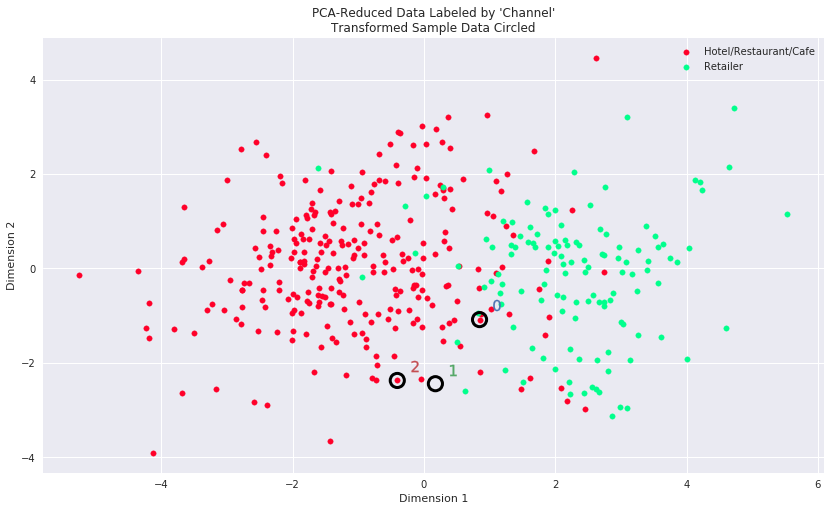

In [61]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- The GMM and K-Means clustering algorithms predicted that two clusters would have the maximum mean silhouette coefficient. The 'Channel' data also has two clusters. Therefore, the GMM and K-Means algorithm did very well.
- As we can see in the graph above, the clusters can be approximately separated by a verticle line. Hence, if we ignore the middle area where the points from both categories are mixed, the cluster segments could be purly classified as'Retailers' or 'Hotels/Restaurants/Cafes.'
- I would consider these classifications as consistent with my previous definition of the customer segment. As I discussed in answer to question 8, segment 0 and 1 could represent a cafe and market respectively which matches with the underlying distribution. 
